## Data Science Problem Statement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

## Load and Prepare dataset

In [3]:
# Storing the address in 'url' variable
url="https://raw.githubusercontent.com/commit-live-students/Bootcamp_Problem_Statement/master/data/new_train2.csv"
# Importing the file from the address contained in 'url' into 'df' 
df = pd.read_csv(url)
print('Shape of the data is: ',df.shape)
# Showing the first 5 rows of 'df'
df.head()

Shape of the data is:  (32950, 14)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,55,retired,married,basic.4y,no,no,no,cellular,jul,mon,550,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,55,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no


## Check Numeric and Categorical Features

In [4]:
# IDENTIFYING NUMERICAL FEATURES
numeric_data = df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns # we will store the numeric features in a variable
print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

Numeric Features:
   age  duration  campaign
0   49       227         4
1   37       202         2
2   55       550         1
3   36       120         2
4   55       368         2


In [5]:
# IDENTIFYING CATEGORICAL FEATURES
categorical_data = df.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns # we will store the categorical features in a variable
print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
            job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retired   married           basic.4y       no      no   no   cellular   
3        admin.   married  university.degree       no     yes   no  telephone   
4       retired  divorced  university.degree       no      no   no   cellular   

  month day_of_week     poutcome    y  
0   nov         wed  nonexistent   no  
1   nov         wed      failure   no  
2   jul         mon  nonexistent  yes  
3   may         mon  nonexistent   no  
4   jun         tue  nonexistent   no  


In [6]:
# CHECK THE DATATYPES OF ALL COLUMNS:
print(df.dtypes)

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
poutcome       object
y              object
dtype: object


## Check for Class Imbalance

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of 80:20 or greater is typically considered as an imbalance for a binary classification.

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance.

In [7]:
# we are finding the percentage of each class in the feature 'y'
class_values = (df['y'].value_counts()/df['y'].value_counts().sum())*100
print(class_values)

no     88.734446
yes    11.265554
Name: y, dtype: float64


Observations :
The class distribution in the target is ~89:11. This is a clear indication of imbalance.

## Univariate analysis of Categorical columns

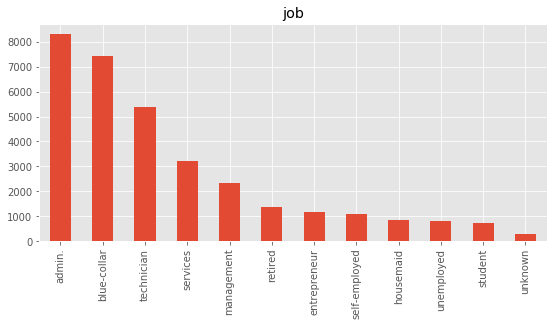

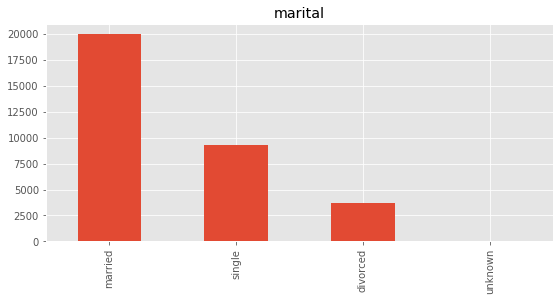

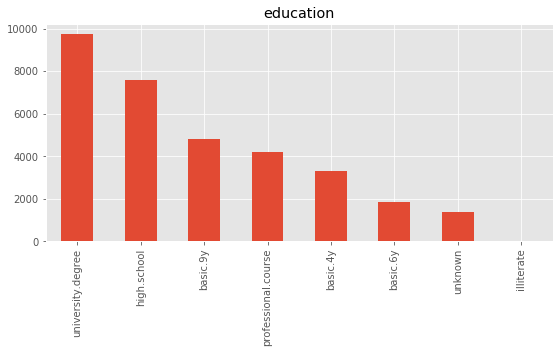

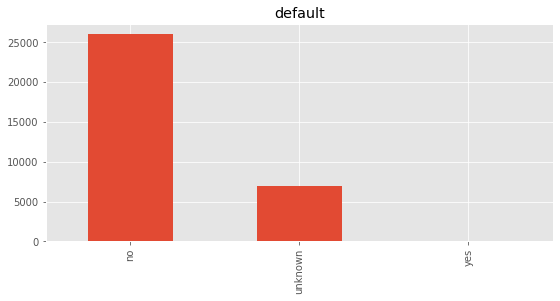

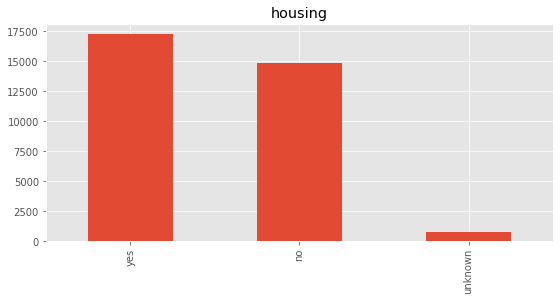

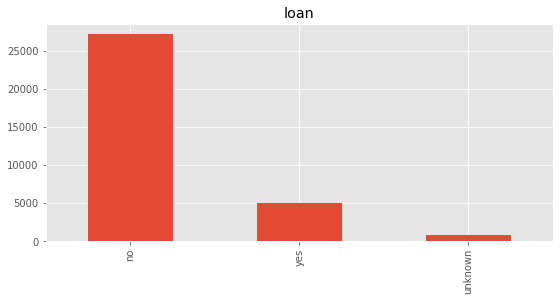

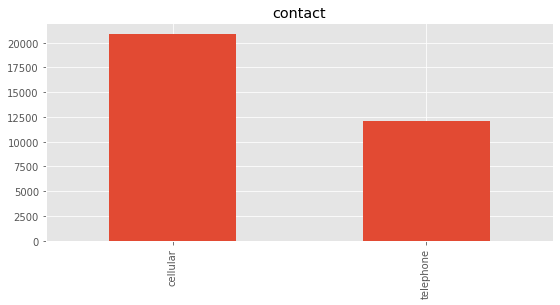

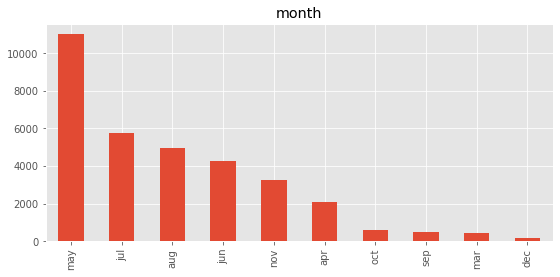

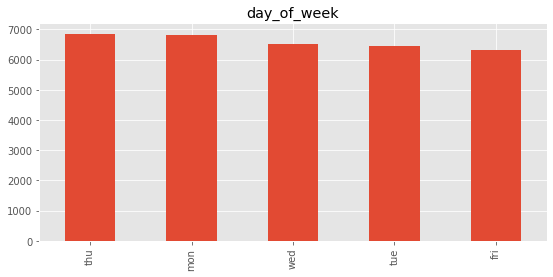

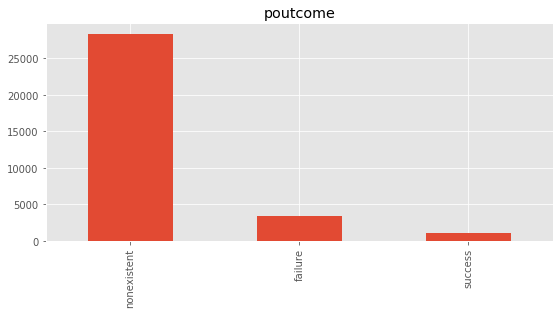

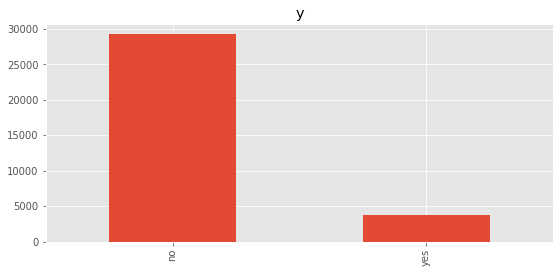

In [8]:
# Selecting the categorical columns
categorical_col = df.select_dtypes(include=['object']).columns
plt.style.use('ggplot') 
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

## Imputing unknown values of categorical columns

The code below imputes the value unknown in the categorical columns with the mode value of that column. You can modify this function to replace any unwanted value(for e.g NaN value) in a column with a value of your choice.

In [9]:
for column in categorical_col:
    mode = df[column].mode()[0] 
    df[column] = df[column].replace('unknown',mode)

## Univariate analysis of Continuous columns

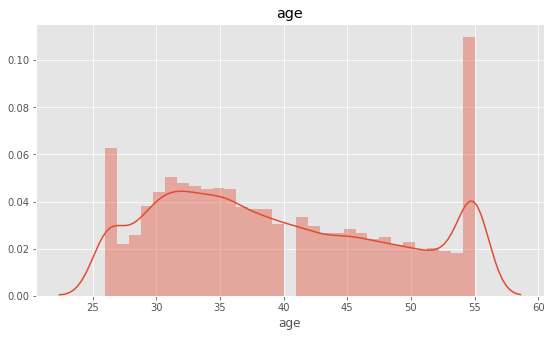

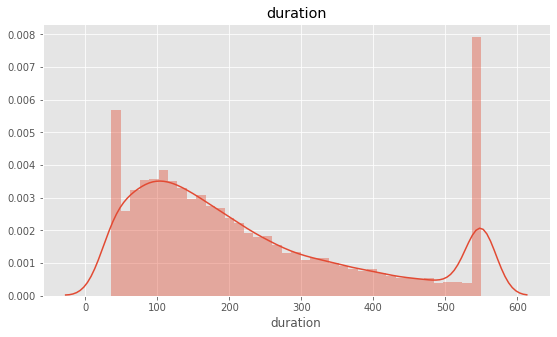

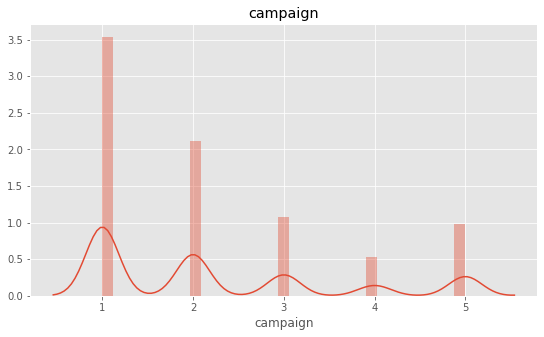

In [10]:
for column in numeric_col:
    plt.figure(figsize=(20,5)) 
    plt.subplot(121) 
    sns.distplot(df[column])
    plt.title(column)

## Bivariate Analysis - Categorical Columns

Bivariate analysis involves checking the relationship between two variables simultaneously. In the code below, we plot every categorical feature against the target by plotting a barchart.

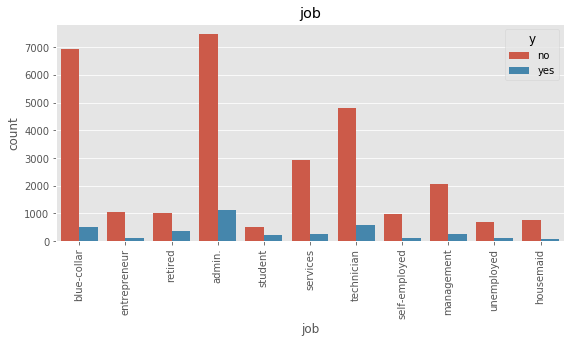

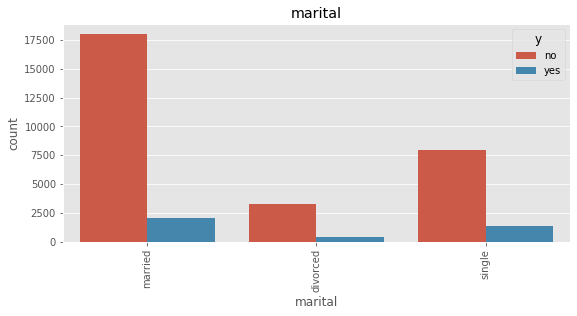

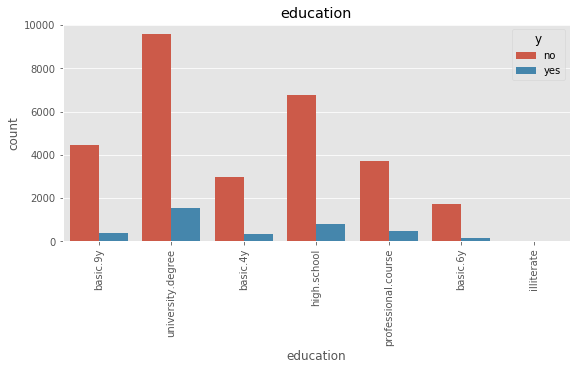

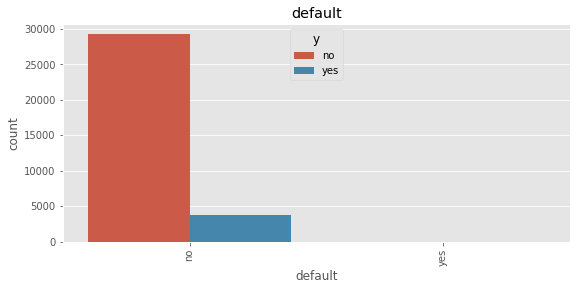

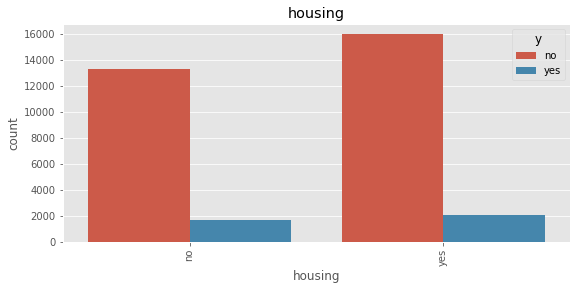

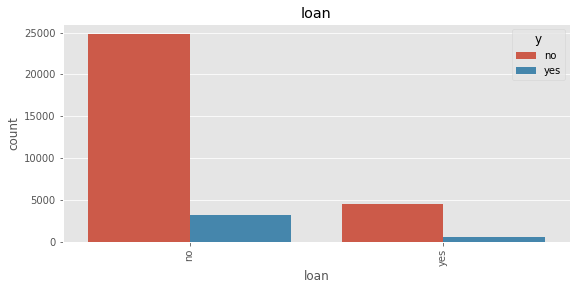

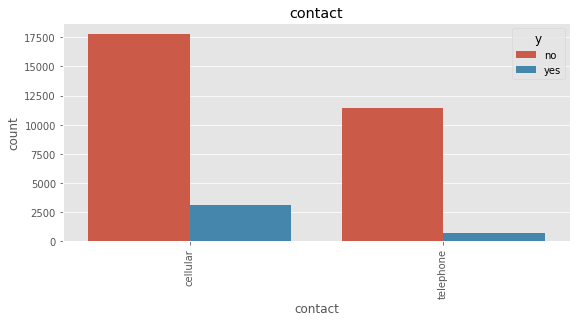

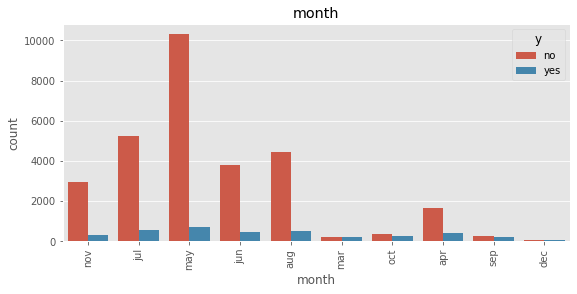

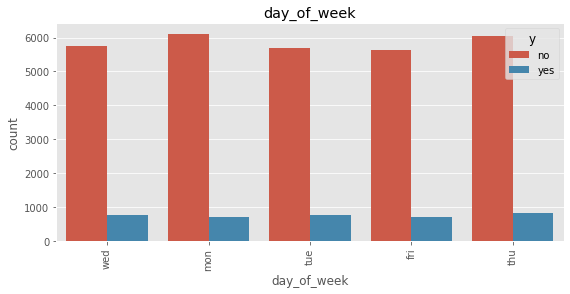

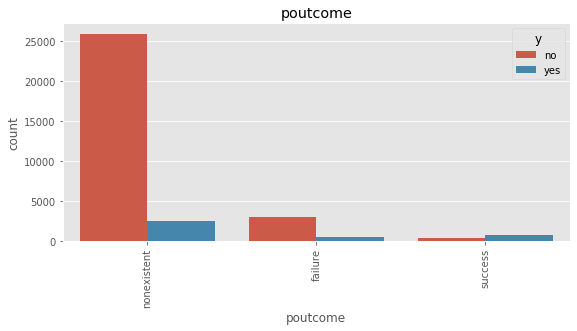

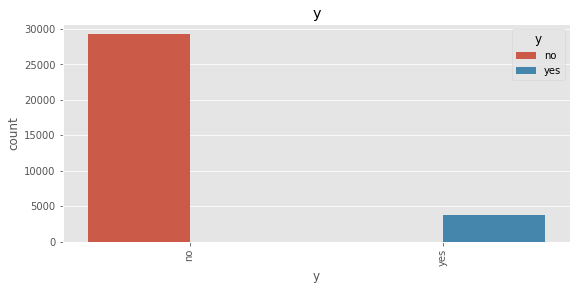

In [11]:
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=df[column],hue=df['y'],data=df)
    plt.title(column)    
    plt.xticks(rotation=90)

## Function to Label Encode Categorical variables

Before applying our machine learning algorithm, we need to recollect that any algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values. Encoding of categorical variables can be performed in two ways:

Label Encoding;
One-Hot Encoding.

In [12]:
# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        df[feature] = le.fit_transform(df[feature])
    except:
        print('Error encoding '+feature)

## Importing necessary libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Data Modelling Libraries

In [14]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

## Load the Preprocessed dataset

In [15]:
# accessing to the folder where the file is stored
url = 'https://raw.githubusercontent.com/commit-live-students/Bootcamp_Problem_Statement/master/data/preprocessed_data.csv'
# Load the dataframe
df = pd.read_csv(url)
print('Shape of the data is: ',df.shape)
df.head()

Shape of the data is:  (32950, 14)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0


## Preparing the train and test data

In [16]:
# Predictors
X = df.iloc[:,:-1]

# Target
y = df.iloc[:,-1]

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=5)

## Fitting the model and predicting the values 

In [17]:
# run Logistic Regression model
model = LogisticRegression()
# fitting the model
model.fit(x_train, y_train)
# predicting the values
y_scores = model.predict(x_val)

## Getting the metrics to check to check the model performance 

ROC_AUC_SCORE is 0.5700944040835397


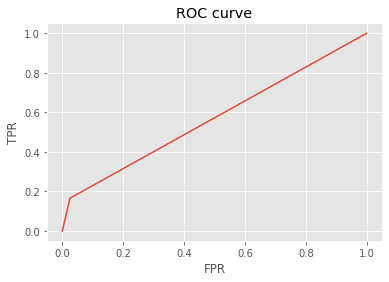

In [18]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### The above two steps are combined and run in a single cell for all the remaining models respectively

ROC_AUC_SCORE is 0.6901313946212809


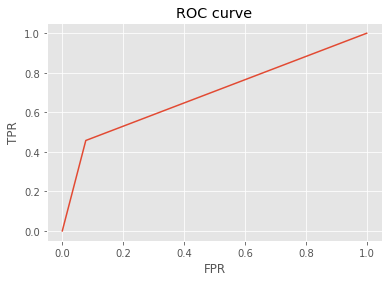

In [19]:
# Run Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.6571365251847688


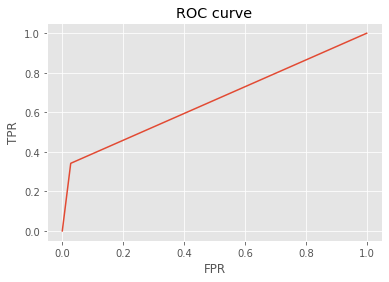

In [20]:
# run Random Forrest Classifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Grid Search for Random Forest

In [21]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


## Applying the best parameters obtained using Grid Search on Random Forest model

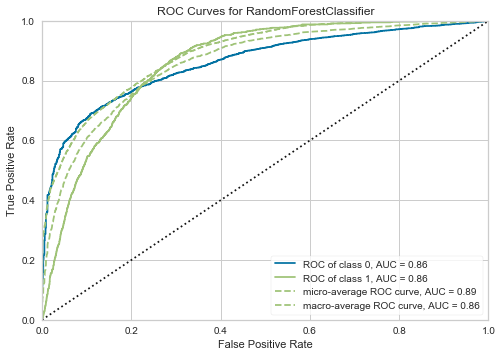

In [23]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_resample(x_train, y_train)
    # Intializing the Random Forrest Classifier
    rfc = RandomForestClassifier(max_features='log2', max_depth=8, criterion='gini',random_state=42)
    # Fit the model on data
    rfc.fit(X_sm, y_sm)
    # Get the predictions on the validation data
    y_pred = rfc.predict(x_val)
    # Evaluation of result with the auc_roc graph
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forest_best(X,y)

## Prediction on the test data

In [24]:
# Preprocessed Test File
url="https://raw.githubusercontent.com/commit-live-students/Bootcamp_Problem_Statement/master/data/new_test.csv"
# Importing the file from the address contained in 'url' into 'df' 
test = pd.read_csv(url)
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [25]:
# Initialize Smote
smote = SMOTE()

# Applying SMOTE
X_sm, y_sm =  smote.fit_resample(x_train, y_train)

# Initialize our Random forrest model with the best parameter values derived
rfc = RandomForestClassifier(max_features='log2', max_depth=8, criterion='gini',random_state=42)

# Fitting the model
rfc.fit(X_sm,y_sm)

# Predict on the preprocessed test file
y_pred = rfc.predict(test)

# storing the predictions
prediction = pd.DataFrame(y_pred,columns=['y'])

# Loading submission file 
url="https://raw.githubusercontent.com/commit-live-students/Bootcamp_Problem_Statement/master/data/submission.csv"

# reading the submission file with client ids
submission = pd.read_csv(url)

# Concatenate predictions and create our final submission file
final_submission = pd.concat([submission['Id'],prediction['y']],1)

# Results
final_submission.head()

,Id,y
0,14455,0
1,36380,0
2,40076,0
3,10778,0
4,27939,0
